# Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import nltk
import re

In [2]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Prekshitha
[nltk_data]     Shetty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df = pd.read_csv('../Project/amazon2 (1).tsv', sep='\t')

In [22]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [24]:
df.shape

(3150, 5)

In [26]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [28]:
df.describe

<bound method NDFrame.describe of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...              

In [30]:
#check for null values
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [32]:
# Getting the record where 'verified_reviews is null'

df[df['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback


In [34]:
#we will drop the null record

df.dropna(inplace=True)

In [36]:
df.shape

(3150, 5)

In [38]:
#creating a new column 'length' that will contain the length of the string in 'verified_reviews' colum

df['length']=df['verified_reviews'].apply(len)

In [40]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [42]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [44]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


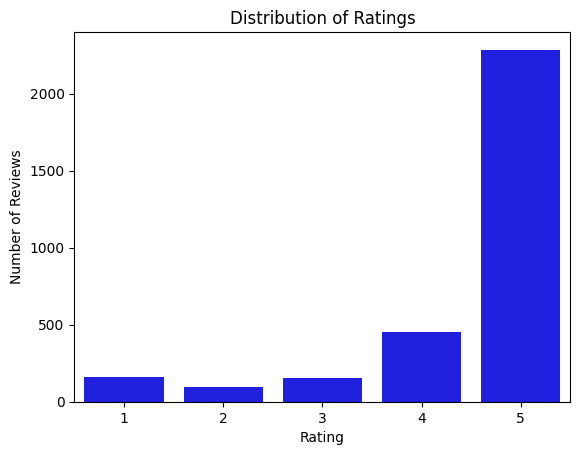

In [46]:
#Bar plot to visualization

sns.countplot(x='rating', data=df, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [48]:
# Distinct values of 'feedback' and its count
print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


In [50]:
#Extracting the 'verified_reviews' value for one record with feedback ==0

review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [52]:
#Extracting the 'verified_reviews' value for one record with feedback ==1

review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


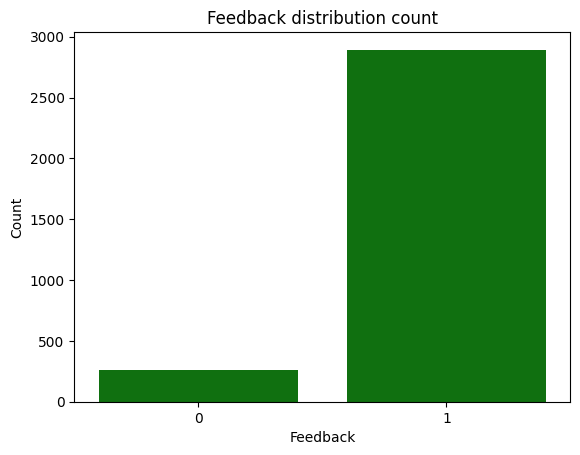

In [54]:
#Bar graph to visualize the totl count of each feedback

sns.countplot(x='feedback', data=df,color='green')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [56]:
#Finding the percentage distribution of each feedback

print(f"Feedback value count- percentage distribution: \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback value count- percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


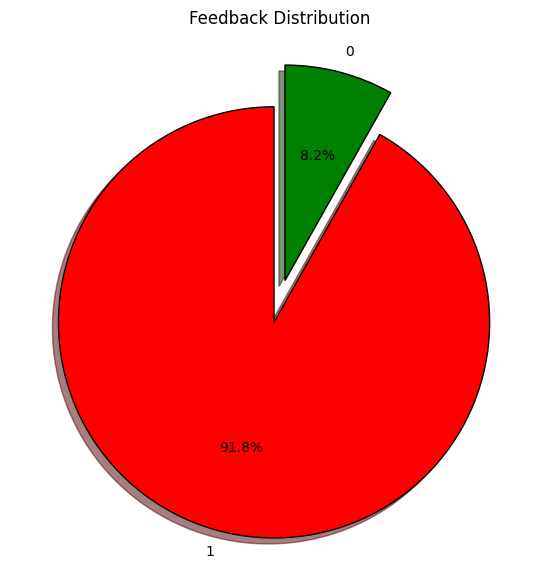

In [58]:
# Calculate value counts of 'feedback' as a fraction of total
tags = df['feedback'].value_counts() / df.shape[0]

# Labels and values
labels = tags.index
sizes = tags.values

# Colors and styling
colors = ('red', 'green')
explode = (0.1, 0.1)  # To "explode" both slices
wp = {'linewidth': 1, "edgecolor": 'black'}

# Create a figure
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode)
ax.set_title('Feedback Distribution')
plt.show()

In [60]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


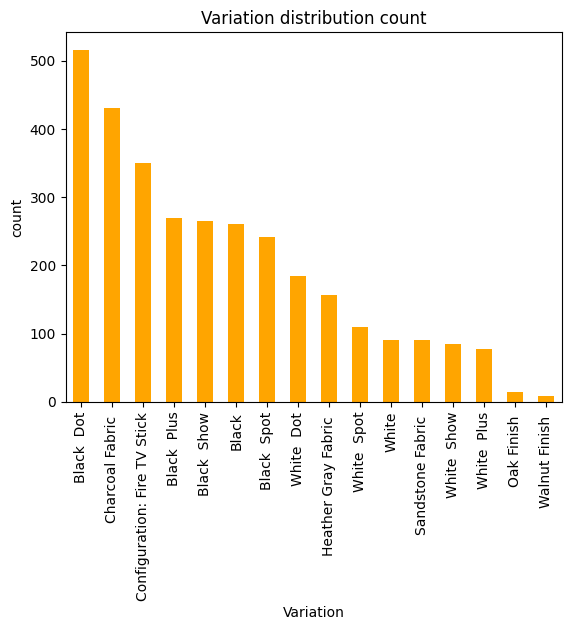

In [62]:
#Bar graph to visualize the total counts of each variation

df['variation'].value_counts().plot.bar(color='orange')
plt.title('Variation distribution count')
plt.xlabel("Variation")
plt.ylabel("count")
plt.show()

In [64]:
#mean rating according to variation
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

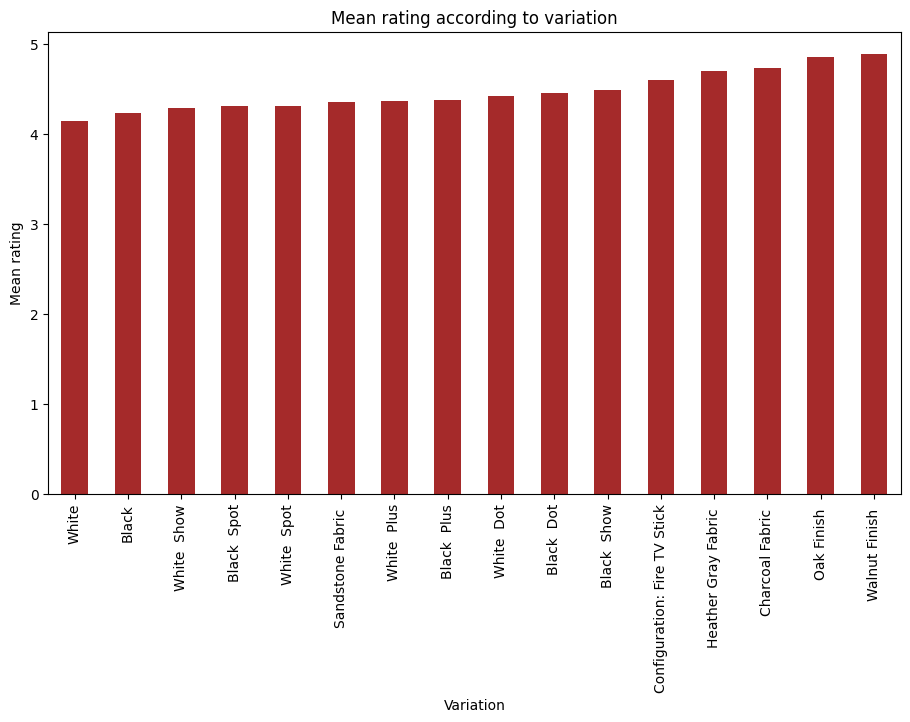

In [68]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown',figsize=(11,6))
plt.title('Mean rating according to variation')
plt.xlabel("Variation")
plt.ylabel("Mean rating")
plt.show()

In [70]:
df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

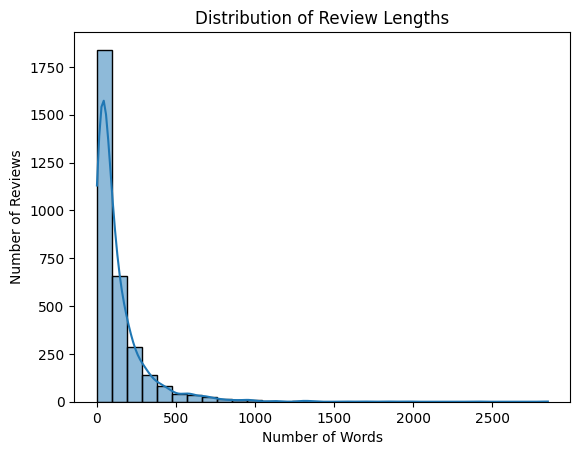

In [72]:
# Plot review length distribution
sns.histplot(df['length'], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()


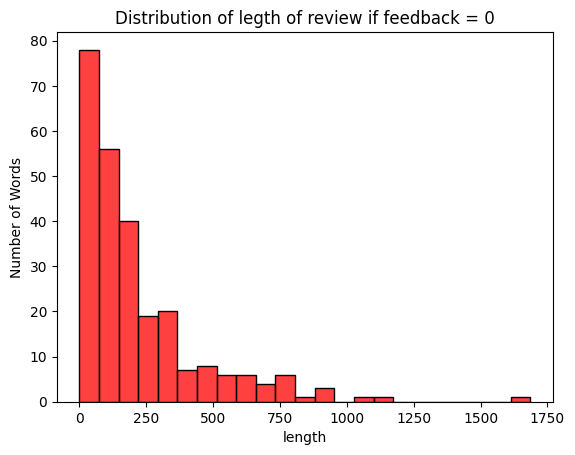

In [74]:
# Length analysis when feedback is 0 (negative)
sns.histplot(df[df['feedback']==0]['length'],color='red')
plt.title("Distribution of legth of review if feedback = 0")
plt.xlabel("length")
plt.ylabel("Number of Words")
plt.show()

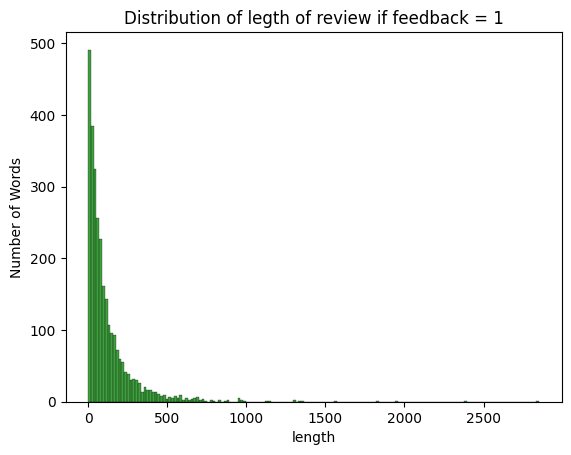

In [76]:
## Length analysis when feedback is 1 (Positive)
sns.histplot(df[df['feedback']==1]['length'],color='green')
plt.title("Distribution of legth of review if feedback = 1")
plt.xlabel("length")
plt.ylabel("Number of Words")
plt.show()

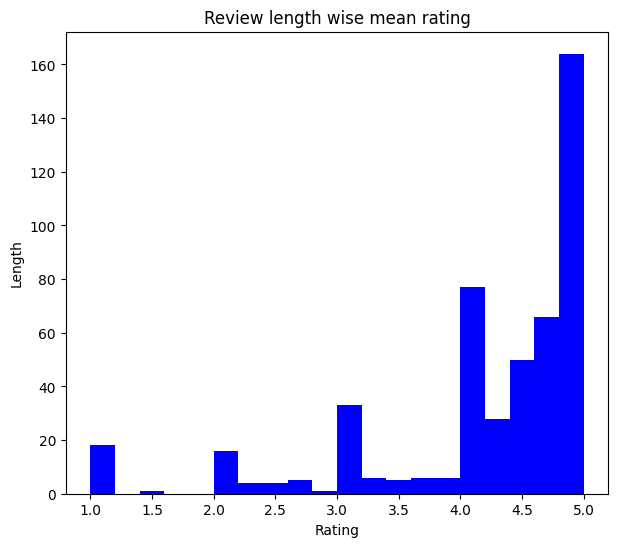

In [78]:
# Length wise mean rating
df.groupby('length')['rating'].mean().plot.hist(color='blue',figsize=(7,6),bins=20)
plt.title("Review length wise mean rating")
plt.ylabel("Length")
plt.xlabel("Rating")
plt.show()

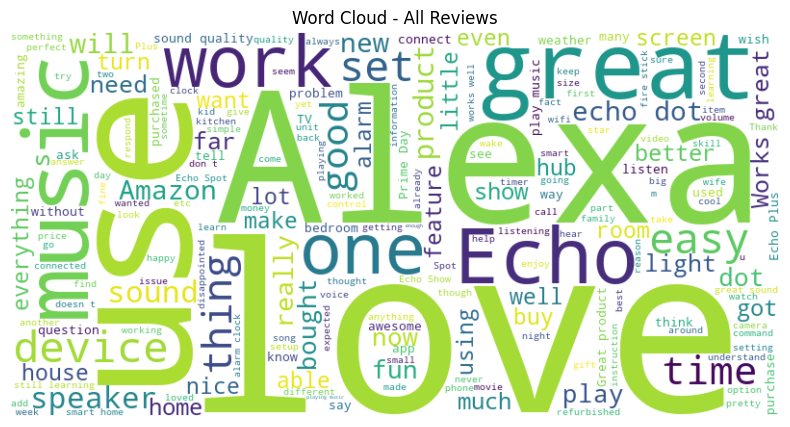

In [80]:
# Word Cloud for all reviews
text_all = " ".join([review for review in df['verified_reviews']])
#initialize wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - All Reviews")
plt.show()

In [82]:
# combine all reviews from each category and splotting them into individual wirds

neg_reviews = " ".join([review for review in df[df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

# finding words from reviews which are present in that feedback ctegory only
unique_negative=[x for x in neg_reviews if x not in pos_reviews]
unique_negative=" ".join(unique_negative)

unique_positive=[x for x in pos_reviews if x not in neg_reviews]
unique_positive=" ".join(unique_positive)


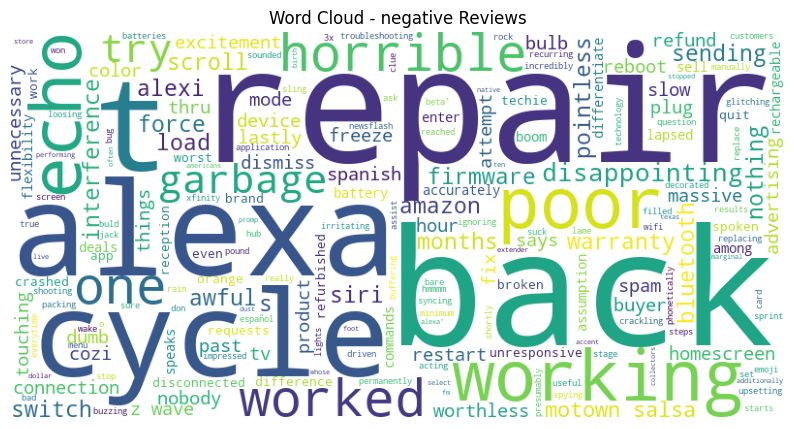

In [84]:
wc= WordCloud(width=800, height=400,background_color='white')

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.axis("off")
plt.title("Word Cloud - negative Reviews")
plt.show()

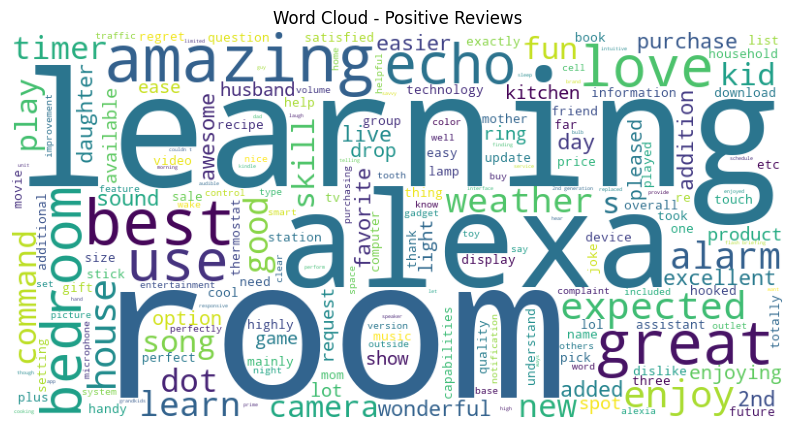

In [86]:
wc= WordCloud(width=800, height=400,background_color='white')

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title("Word Cloud - Positive Reviews")
plt.axis("off")
plt.show()

In [88]:
#Clean the text
#Remove punctuation, lowercasing, and removing stopwords
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):

    text = re.sub(r'[^\w\s]', '', text) #remove non-letters
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

    df['cleaned_text']= df['text'].apply(preprocess_text)

In [90]:
#Tokenization
import nltk # importing nltk library here to explicitly download the required resource within the code snippet

from nltk.tokenize import word_tokenize
nltk.download('punkt_tab') # downloading the punkt resource

def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to the 'verified_reviews' column
df['tokenized_text'] = df['verified_reviews'].apply(tokenize_text)

[nltk_data] Downloading package punkt_tab to C:\Users\Prekshitha
[nltk_data]     Shetty\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [92]:
#Vectorise the text data using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['verified_reviews'])
#We can't give text directly to a machine learning model.

In [94]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [96]:
X=df['verified_reviews']
y=df['feedback']

In [99]:
vectorizer = TfidfVectorizer()
X_df = vectorizer.fit_transform(X)

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y,test_size=0.2,random_state=42)

In [103]:
X_train,X_test,y_train,y_test

(<2520x4044 sparse matrix of type '<class 'numpy.float64'>'
 	with 49177 stored elements in Compressed Sparse Row format>,
 <630x4044 sparse matrix of type '<class 'numpy.float64'>'
 	with 11675 stored elements in Compressed Sparse Row format>,
 2310    1
 2189    1
 2304    0
 2988    1
 221     1
        ..
 3092    1
 1095    1
 1130    1
 1294    1
 860     1
 Name: feedback, Length: 2520, dtype: int64,
 2965    1
 969     1
 1385    1
 1233    1
 2996    1
        ..
 765     1
 1041    1
 790     1
 2815    1
 1565    1
 Name: feedback, Length: 630, dtype: int64)

In [105]:
model1=LogisticRegression()

In [107]:
model1.fit(X_train,y_train)

LogisticRegression()

In [109]:
y_pred=model1.predict(X_test)

In [111]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [113]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}")

Accuracy: 0.9079365079365079
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.91      1.00      0.95       572

    accuracy                           0.91       630
   macro avg       0.45      0.50      0.48       630
weighted avg       0.82      0.91      0.86       630

Confusion Matrix: 
[[  0  58]
 [  0 572]]


C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [115]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [117]:
y_pred=model2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [119]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}")

Accuracy: 0.9412698412698413
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        58
           1       0.94      1.00      0.97       572

    accuracy                           0.94       630
   macro avg       0.97      0.68      0.75       630
weighted avg       0.94      0.94      0.93       630

Confusion Matrix: 
[[ 21  37]
 [  0 572]]


In [121]:
model3=MultinomialNB()
model3.fit(X_train,y_train)

MultinomialNB()

In [123]:
y_pred=model3.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [125]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}")

Accuracy: 0.9079365079365079
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.91      1.00      0.95       572

    accuracy                           0.91       630
   macro avg       0.45      0.50      0.48       630
weighted avg       0.82      0.91      0.86       630

Confusion Matrix: 
[[  0  58]
 [  0 572]]


C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [127]:
model4=LinearSVC()
model4.fit(X_train,y_train)

LinearSVC()

In [129]:
y_pred=model4.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [131]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}")

Accuracy: 0.9492063492063492
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        58
           1       0.95      1.00      0.97       572

    accuracy                           0.95       630
   macro avg       0.96      0.73      0.80       630
weighted avg       0.95      0.95      0.94       630

Confusion Matrix: 
[[ 27  31]
 [  1 571]]


In [133]:
model5=KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
y_pred=model5.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [137]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred)}")

Accuracy: 0.8857142857142857
Classification Report: 
              precision    recall  f1-score   support

           0       0.25      0.12      0.16        58
           1       0.92      0.96      0.94       572

    accuracy                           0.89       630
   macro avg       0.58      0.54      0.55       630
weighted avg       0.85      0.89      0.87       630

Confusion Matrix: 
[[  7  51]
 [ 21 551]]


In [139]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [141]:
# Collect metrics

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (0)': precision_score(y_test, y_pred, pos_label=0),
        'Recall (0)': recall_score(y_test, y_pred, pos_label=0),
        'F1-score (0)': f1_score(y_test, y_pred, pos_label=0),
        'Precision (1)': precision_score(y_test, y_pred, pos_label=1),
        'Recall (1)': recall_score(y_test, y_pred, pos_label=1),
        'F1-score (1)': f1_score(y_test, y_pred, pos_label=1),
    })

C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Prekshitha Shetty\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [143]:
df_results = pd.DataFrame(results).round(3)
df_results.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision (0),Recall (0),F1-score (0),Precision (1),Recall (1),F1-score (1)
2,Linear SVC,0.949,0.964,0.466,0.628,0.949,0.998,0.973
3,Random Forest,0.938,1.000,0.328,0.494,0.936,1.000,0.967
0,Logistic Regression,0.908,0.000,0.000,0.000,0.908,1.000,0.952
1,Naive Bayes,0.908,0.000,0.000,0.000,0.908,1.000,0.952
4,KNN,0.886,0.250,0.121,0.163,0.915,0.963,0.939


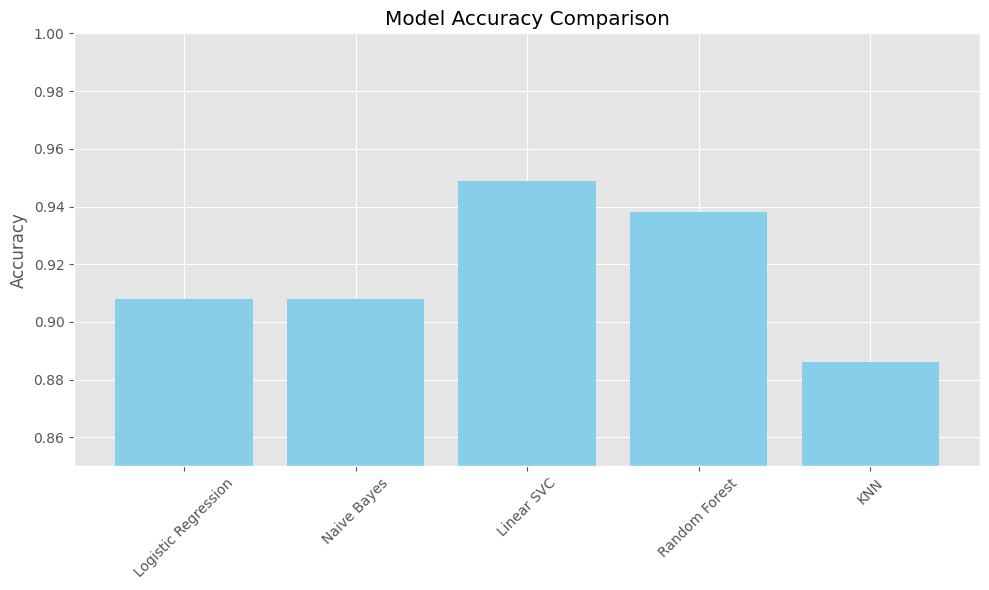

In [145]:
# model Accuracy Comparision

# Set figure size and style
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

# Plot Accuracy
plt.bar(df_results['Model'], df_results['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


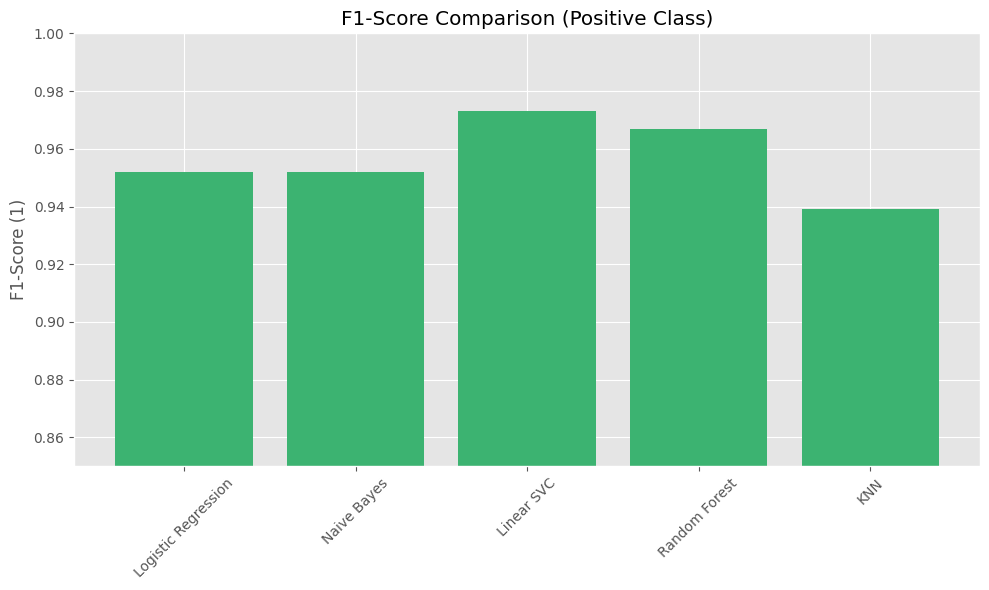

In [147]:
#
plt.figure(figsize=(10, 6))
plt.bar(df_results['Model'], df_results['F1-score (1)'], color='mediumseagreen')
plt.title('F1-Score Comparison (Positive Class)')
plt.ylabel('F1-Score (1)')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [149]:
#Best Model
best_model = df_results.loc[df_results['F1-score (1)'].idxmax()]
print("Best Model Based on F1-score (1):")
print(best_model[['Model', 'F1-score (1)']])

Best Model Based on F1-score (1):
Model           Linear SVC
F1-score (1)         0.973
Name: 2, dtype: object
